In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import inspect
import re
pd.set_option('display.max_columns', 33)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
#Importamos las funciones que creamos y estan en el archivo mis_funciones para poder llamarlas directamente 
import mis_funciones
import importlib
importlib.reload(mis_funciones)
from mis_funciones import *

In [7]:
df = pd.read_csv(r"C:\Users\wipip\OneDrive\Documentos\GitHub\Proyecto-Clasificacion-de-Score-Crediticio-main\PROYECTO\src\train.csv",low_memory=False)
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
df.drop(["Name", "SSN", "ID", "Customer_ID"], axis=1, inplace=True, errors="ignore")


In [9]:
print("Credit Score Class Distribution")
print("Poor: ",df['Credit_Score'].value_counts()['Poor'])
print("Standard: ",df['Credit_Score'].value_counts()['Standard'])
print("Good: ",df['Credit_Score'].value_counts()['Good'])

Credit Score Class Distribution
Poor:  28998
Standard:  53174
Good:  17828


In [10]:
def text_to_months(text):
    if pd.isna(text):
        return 0
    # Split the text into individual words
    words = text.split()

    # Extract the years and months
    years = int(words[0])
    months = int(words[3]) if len(words) > 3 else 0

    # Calculate the total number of months
    total_months = years * 12 + months

    return total_months

df['Credit_History_Age'] = df['Credit_History_Age'].apply(text_to_months)

In [11]:
df.head()


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,265,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,0,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,267,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,268,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [12]:
def replace_special_character(text):
        if "NM" in str(text):
            return "No"

        if "payments" in str(text) or "_" not in str(text):
            return text

        clean_text = str(text).replace("_", "")
        try:
            clean_text = pd.to_numeric(clean_text)
        except ValueError as e:
            clean_text = np.nan
        return np.nan if clean_text == "nan" or clean_text == "" else clean_text

In [13]:
df['Age'] = pd.to_numeric(df['Age'].apply(replace_special_character))
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'].apply(replace_special_character))
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'].apply(replace_special_character))
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].apply(replace_special_character))
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'].apply(replace_special_character))
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'].apply(replace_special_character))
df['Monthly_Balance'] =  pd.to_numeric(df['Monthly_Balance'].apply(replace_special_character))
df['Num_of_Loan'] =  pd.to_numeric(df['Num_of_Loan'].apply(replace_special_character))

In [14]:
def remove_outliers(x,f):
    try:
        # Convert to numeric
        x = pd.to_numeric(x, errors='raise')
        
        # Handle negative values
        if x < 0:
            return np.nan
        else:
            if f == 'age':
                if x>=100:
                    return np.nan
                else:
                    return x
            else:
                return x
    except ValueError:
        return np.nan

df['Age'] = df.apply(lambda x: remove_outliers(x['Age'], 'age'), axis=1)
df['Num_of_Delayed_Payment'] = df.apply(lambda x: remove_outliers(x['Num_of_Delayed_Payment'], 'none'), axis=1)
df['Num_of_Loan'] = df.apply(lambda x: remove_outliers(x['Num_of_Loan'], 'none'), axis=1)

In [15]:
df['Annual_Income'].fillna(df['Annual_Income'].median())
df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median())
df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].median())
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median())
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median())
df = df.dropna(subset=['Num_of_Loan'])

In [16]:
df = df.dropna(subset=['Type_of_Loan'])


In [17]:
# Step 1: Split the 'Type_of_Loan' column by commas and 'and', handling whitespace
Type_of_Loan = df['Type_of_Loan'].str.split(r',\s*and\s*|\s*,\s*')

# Step 2: Explode the resulting list into separate rows
Type_of_Loan = Type_of_Loan.explode()

# Step 3: Get the unique loan types
loan_type_label = Type_of_Loan.unique()

# Display the unique loan types
loan_type_label


array(['Auto Loan', 'Credit-Builder Loan', 'Personal Loan',
       'Home Equity Loan', 'Not Specified', 'Mortgage Loan',
       'Student Loan', 'Debt Consolidation Loan', 'Payday Loan'],
      dtype=object)

In [18]:
num_rows = df.shape[0]
print("Number of rows:", num_rows)


Number of rows: 85133


In [19]:
def replace_and(text):
        clean_text = str(text).replace(" and", "")
        return np.nan if clean_text == "nan" else clean_text

In [20]:
df['Type_of_Loan'] = df['Type_of_Loan'].apply(replace_and)
for loan_type in loan_type_label:
    df['Count_' + loan_type] = df['Type_of_Loan'].apply(lambda x: x.split(', ').count(loan_type))

In [21]:
df.drop(['Num_of_Loan'], axis=1, inplace=True, errors="ignore")


In [22]:
df.loc[df['Type_of_Loan'] == 'Auto Loan, Auto Loan']


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Count_Auto Loan,Count_Credit-Builder Loan,Count_Personal Loan,Count_Home Equity Loan,Count_Not Specified,Count_Mortgage Loan,Count_Student Loan,Count_Debt Consolidation Loan,Count_Payday Loan
912,January,39.0,Manager,30536.62,2430.718333,6,6,7,"Auto Loan, Auto Loan",19,7.0,9.33,4.0,Standard,687.87,31.022659,184,Yes,42.972441,96.728994,High_spent_Medium_value_payments,353.370398,Standard,2,0,0,0,0,0,0,0,0
913,February,39.0,Manager,30536.62,2430.718333,6,6,7,"Auto Loan, Auto Loan",19,8.0,9.33,NaN,Standard,687.87,31.644323,185,Yes,42.972441,75.760289,High_spent_Medium_value_payments,374.339103,Standard,2,0,0,0,0,0,0,0,0
914,March,39.0,Manager,30536.62,2430.718333,6,6,7,"Auto Loan, Auto Loan",19,8.0,9.33,4.0,_,687.87,38.635501,186,Yes,42.972441,36.641424,High_spent_Medium_value_payments,413.457968,Standard,2,0,0,0,0,0,0,0,0
915,April,39.0,_______,30536.62,NaN,6,6,7,"Auto Loan, Auto Loan",19,8.0,9.33,4.0,Standard,687.87,35.475673,187,Yes,42.972441,140.187694,!@9#%8,349.911698,Standard,2,0,0,0,0,0,0,0,0
916,May,39.0,Manager,30536.62,2430.718333,6,6,7,"Auto Loan, Auto Loan",19,8.0,4.33,4.0,_,687.87,35.248950,188,Yes,42.972441,115.584498,Low_spent_Large_value_payments,354.514895,Poor,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89874,March,26.0,Scientist,53878.98,4328.915000,4,3,5,"Auto Loan, Auto Loan",11,21.0,1.49,3.0,_,1119.16,28.444936,216,No,78.350637,310.650514,Low_spent_Large_value_payments,313.890349,Good,2,0,0,0,0,0,0,0,0
89875,April,26.0,Scientist,53878.98,NaN,4,3,5,"Auto Loan, Auto Loan",11,18.0,1.49,3.0,Good,1119.16,36.220264,217,No,78.350637,244.668567,Low_spent_Medium_value_payments,389.872296,Standard,2,0,0,0,0,0,0,0,0
89876,May,26.0,Scientist,53878.98,4328.915000,4,3,5,"Auto Loan, Auto Loan",11,18.0,1.49,3.0,Good,1119.16,32.558405,218,No,78.350637,205.122751,Low_spent_Medium_value_payments,429.418113,Standard,2,0,0,0,0,0,0,0,0
89877,June,26.0,_______,53878.98,4328.915000,4,3,5,"Auto Loan, Auto Loan",11,18.0,1.49,3.0,_,1119.16,37.532753,219,No,78.350637,111.186955,Low_spent_Large_value_payments,513.353908,Standard,2,0,0,0,0,0,0,0,0


In [23]:
df.drop(["Type_of_Loan"], axis=1, inplace=True, errors="ignore")


In [24]:
df.dropna(inplace=True)
df["Age"] = pd.to_numeric(df["Age"])
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"])
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"])
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"])
df["Outstanding_Debt"] = pd.to_numeric(df["Outstanding_Debt"])
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"])
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"])

In [25]:
df.head()


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Count_Auto Loan,Count_Credit-Builder Loan,Count_Personal Loan,Count_Home Equity Loan,Count_Not Specified,Count_Mortgage Loan,Count_Student Loan,Count_Debt Consolidation Loan,Count_Payday Loan
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,3,7.0,11.27,4.0,_,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,1,1,0,0,0,0,0
6,July,23.0,Scientist,19114.12,1824.843333,3,4,3,3,8.0,11.27,4.0,Good,809.98,22.537593,271,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,1,1,1,1,0,0,0,0,0
7,August,23.0,Scientist,19114.12,1824.843333,3,4,3,3,6.0,11.27,4.0,Good,809.98,23.933795,0,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,1,1,1,1,0,0,0,0,0
8,January,28.0,_______,34847.84,3037.986667,2,4,6,3,4.0,5.42,2.0,Good,605.03,24.464031,319,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,0,1,0,0,0,0,0,0,0
9,February,28.0,Teacher,34847.84,3037.986667,2,4,6,7,1.0,7.42,2.0,Good,605.03,38.550848,320,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,0,1,0,0,0,0,0,0,0


In [26]:
df.drop(df[df['Occupation'] == '_______'].index, inplace = True)
df.drop(df[df['Payment_of_Min_Amount'] == 'NM'].index, inplace = True)

In [27]:
df.drop(df[df['Credit_Mix'] == '_'].index, inplace = True)


In [28]:
df.drop(df[df['Payment_Behaviour'] == '!@9#%8'].index, inplace = True)


In [29]:
print('Number of Rows with Missing Values: ', df.isnull().any(axis=1).sum())
print('Number of Rows: ', df.any(axis=1).sum())

Number of Rows with Missing Values:  0
Number of Rows:  35688


In [30]:
print("Poor: ",df['Credit_Score'].value_counts()['Poor'])
print("Standard: ",df['Credit_Score'].value_counts()['Standard'])
print("Good: ",df['Credit_Score'].value_counts()['Good'])

Poor:  11139
Standard:  18956
Good:  5593


In [32]:

def heatmap(df):
    df_numerico = df.select_dtypes(include=['number'])
    corr = df_numerico.corr()
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    plt.figure(figsize=(24, 16))
    sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Heatmap de Correlación de Variables Numéricas')
    plt.show()

In [34]:
mapeo_manual_objetivo = {
    'Good': 3,
    'Standard': 2,
    'Poor': 1
}

In [35]:
df_encoded = df.copy()

In [37]:
df_encoded['Credit_Score'] = df['Credit_Score'].map(mapeo_manual_objetivo)

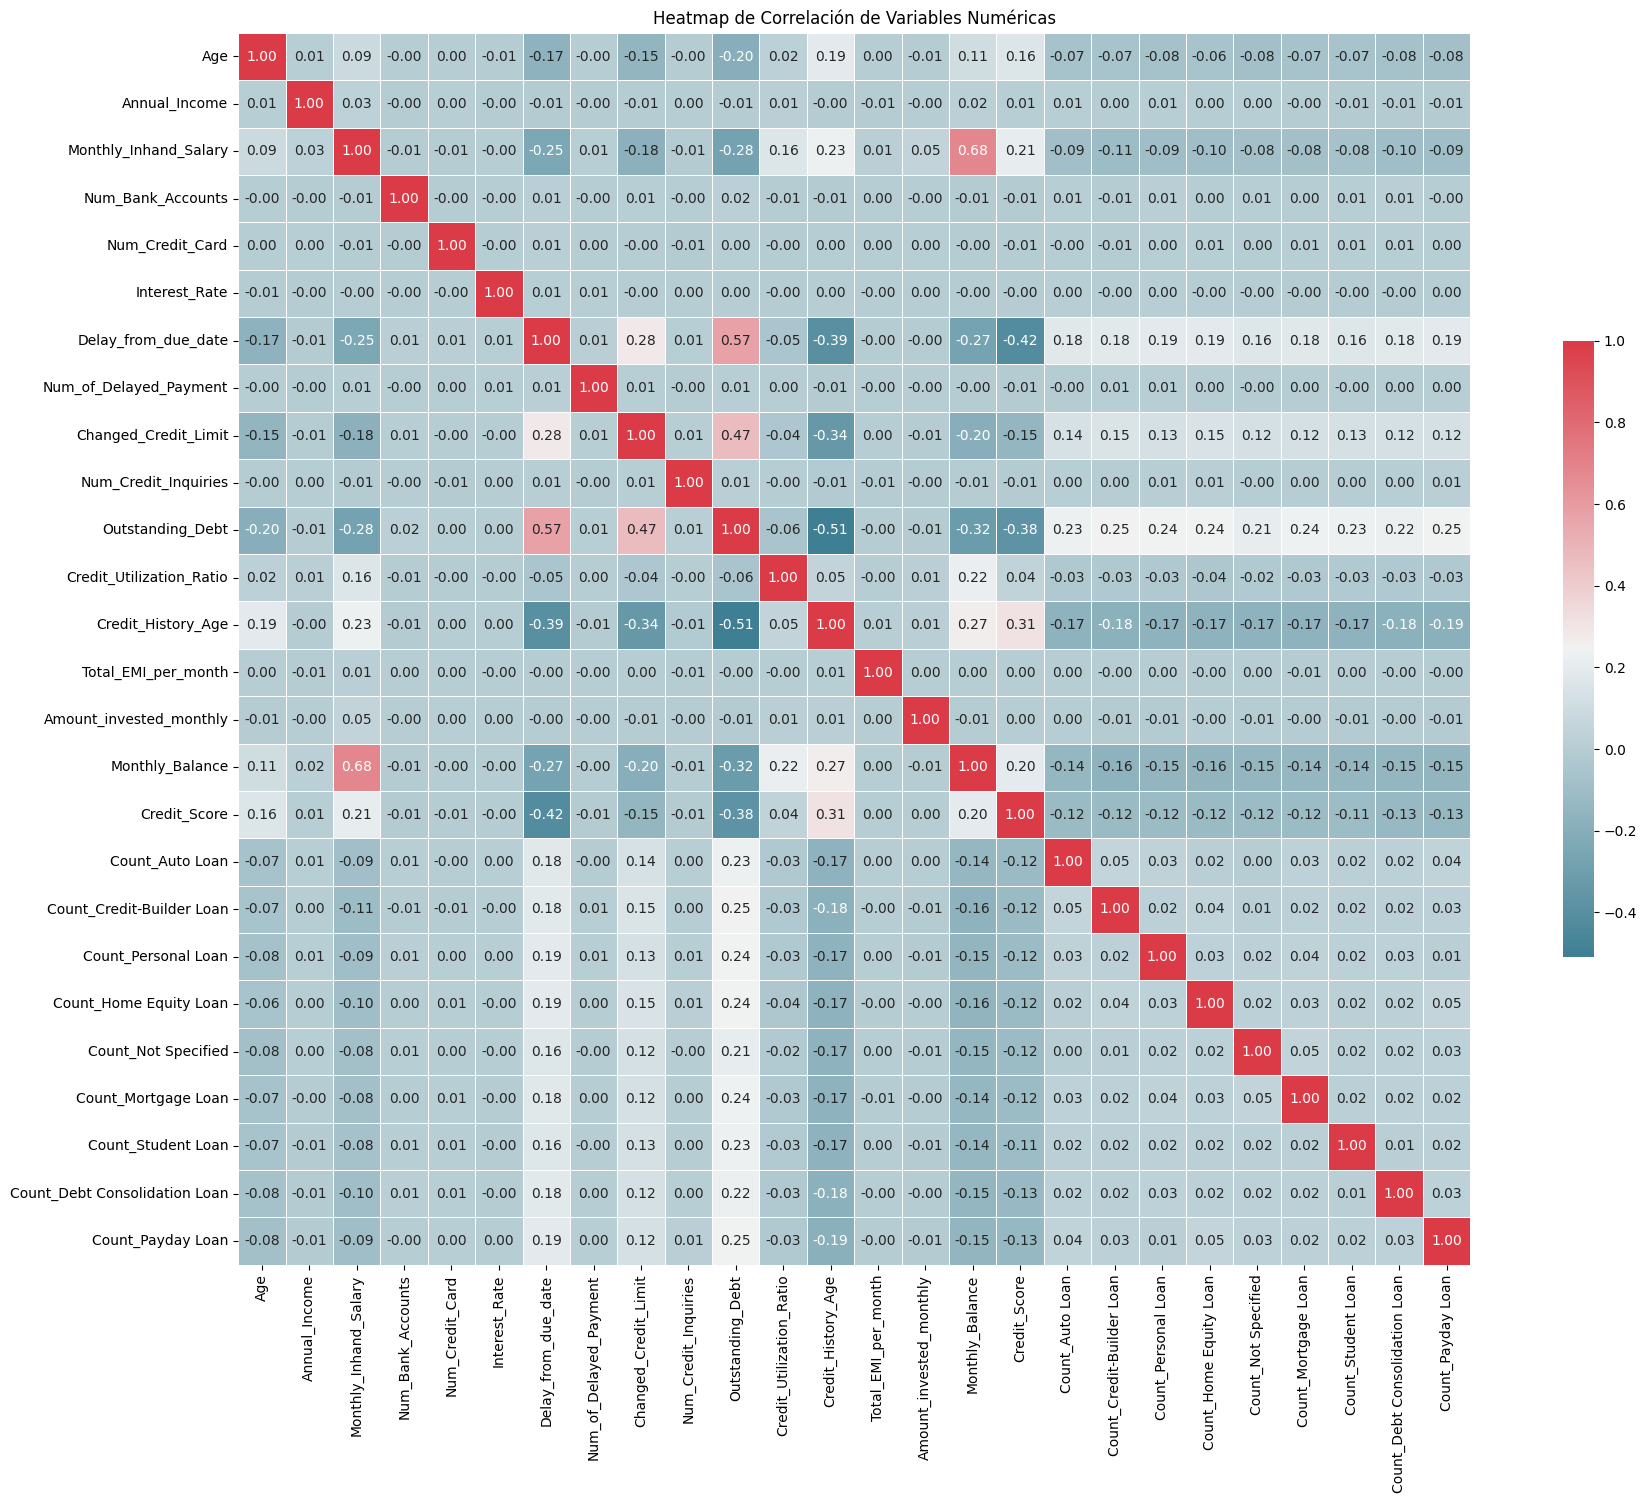

In [38]:
heatmap(df_encoded)